# Python_analitic

# Урок 1. Оформление ноутбука и закрепление функций и генераторов

Сдавать ссылкой на github

## Условие 1:

Оформляйте ноутбук, используя эти советы: 
Номер задачи - заголовок 2 
Номер подзадачи - заголовок 3 
Предоставленные наборы данных оформляйте, как код 
Рекомендации для преподавателей по оценке задания: 
Смотреть, чтобы студент красиво оформлял ноутбук, использовал ячейки с текстом, указывал номера заданий

## Задача 2:

На складе лежат разные фрукты в разном количестве. 
Нужно написать функцию, которая на вход принимает любое количество названий фруктов и их количество,
а возвращает общее количество фруктов на складе

In [1]:
import json
import os
import re
import pandas as pd 


def load_data(file_name='fruits.json'):
    """Функция выгрузки информации о фруктах и их количестве в граммах
    Возвращает:
    - Список наименований фруктов и их количества на складе
    - В случае пустых данных - возвращается пустой словарь"""

    if os.path.exists(file_name):
            with open(file_name, "r", encoding="utf-8") as r:
                data = json.load(r)
                return data
    else:
        return {}


def save_data(data: dict, file_name='fruits.json'):
    """Функция сохраняет наименования фруктов и их количества на складе

    - Принимает данные добавленных фруктов и количеста, и сохраняет их в json файл"""
    
    with open(file_name, "w", encoding="utf-8") as s:
        json.dump(data, s, ensure_ascii=False, indent=4)


class EmptyFruits(Exception):
    pass


def add_fruits(*args, **kwargs):
    """Добавить новый фрукт на складе

    - принимает наименование фрукта и его количество, разделение проиходит через ": "
    - - 1. В случае если фрукт уже находится в базе данных, изменяется только его количество, если оно не совпадает
    с текущим количеством, иначе изменение не произойдет для тех фруктов, где совпадает.
    - - 1.1. Программа не добавляет уже существующие фрукты, а только новые и приводит все к правильному виду. 
    Так же игнорирует неверное введение количества, фильтруя только числовые значения. 
    - - 2. В случае, если запись новая - она добавляется полностью."""
    
    try:
        if not args and not kwargs:
            raise EmptyFruits
        data = load_data()
        for arg in args:
            name, count = arg.split(": ")
            name = name.title()
            count = int("".join(re.findall(r"\d+", count)))
            if name in data.keys():
                if count == data[name]:
                    print(f"Сейчас {name} на складе {count} грамм. Изменения не требуются")
                else:
                    data[name] = count
                    print(f"Количество {name} изменено на {count} грамм")
            else:
                data[name] = count                      
                print(f"Продукт {name} добавлен(ы) в количестве {count} грамм")
        for key, value in kwargs.items():
            name = key.title()
            count = int(value)
            if name in data.keys():
                if count == data[name]:
                    print(f"Сейчас {name} на складе {count} грамм. Изменения не требуются")
                else:
                    data[name] = count
                    print(f"Количество {name} изменено на {count} грамм")
            else:
                data[name] = count
                print(f"Продукт {name} добавлен(ы) в количестве {count} грамм")
        save_data(data)
        if data:
            df = pd.DataFrame.from_dict(data, orient='index', columns=['Количество (г)'])
            df.loc["Общий вес: "] = [df["Количество (г)"].sum()]
            return df
        else:
            print("Нет данных для создания DataFrame")
            return None
    except EmptyFruits:
        return "Вы не ввели ни одного продукта"


# Первое внесение продуктов в базу данных, правильное внесение. 
add_fruits("Груши: 200", "Яблоки: 400", "Манго: 400", "Бананы: 500")

Продукт Груши добавлен(ы) в количестве 200 грамм
Продукт Яблоки добавлен(ы) в количестве 400 грамм
Продукт Манго добавлен(ы) в количестве 400 грамм
Продукт Бананы добавлен(ы) в количестве 500 грамм


,Количество (г)
Груши,200
Яблоки,400
Манго,400
Бананы,500
Общий вес:,1500


In [2]:
# Неверное внесение количества
add_fruits("Ананас: янеправильноввожу125грамм")

Продукт Ананас добавлен(ы) в количестве 125 грамм


,Количество (г)
Груши,200
Яблоки,400
Манго,400
Бананы,500
Ананас,125
Общий вес:,1625


In [3]:
# Внесение уже существующего фрукта с изменением
add_fruits("Яблоки: 500")

Количество Яблоки изменено на 500 грамм


,Количество (г)
Груши,200
Яблоки,500
Манго,400
Бананы,500
Ананас,125
Общий вес:,1725


In [4]:
# Внесение уже существующего фрукта без изменений
add_fruits("Яблоки: 500")

Сейчас Яблоки на складе 500 грамм. Изменения не требуются


,Количество (г)
Груши,200
Яблоки,500
Манго,400
Бананы,500
Ананас,125
Общий вес:,1725


In [5]:
# Ничего не передано в функцию
add_fruits()

'Вы не ввели ни одного продукта'

In [6]:
# Ввод keyword argument
add_fruits(Яблоки=600, Арбуз=300)

Количество Яблоки изменено на 600 грамм
Продукт Арбуз добавлен(ы) в количестве 300 грамм


,Количество (г)
Груши,200
Яблоки,600
Манго,400
Бананы,500
Ананас,125
Арбуз,300
Общий вес:,2125


In [7]:
# Комбинации
add_fruits("Яблоки: 75неверныйввод0", "Мандарины: 550грамм", Кешью=400)

Количество Яблоки изменено на 750 грамм
Продукт Мандарины добавлен(ы) в количестве 550 грамм
Продукт Кешью добавлен(ы) в количестве 400 грамм


,Количество (г)
Груши,200
Яблоки,750
Манго,400
Бананы,500
Ананас,125
Арбуз,300
Мандарины,550
Кешью,400
Общий вес:,3225


## Задача 3

Дан список с затратами на рекламу.
Но в данных есть ошибки, некоторые затраты имеют отрицательную величину. 
Удалите такие значения из списка и посчитайте суммарные затраты
[100, 125, -90, 345, 655, -1, 0, 200] 
Используйте list comprehensions

In [8]:
# 1 вариант
sum(filter(lambda x: x >= 0, [100, 125, -90, 345, 655, -1, 0, 200]))

1425

In [9]:
# 2 вариант
sum([i for i in [100, 125, -90, 345, 655, -1, 0, 200] if i >= 0])

1425

In [10]:
# 3 вариант 
import numpy as np 

np.array([100, 125, -90, 345, 655, -1, 0, 200]).clip(0).sum()

1425

### Задача 4.1:

Условие 4.1: 
Даны два списка. 
Дата покупки 
['2021-09-14', '2021-12-15', '2021-09-08', '2021-12-05', '2021-10-09', '2021-09-30', '2021-12-22', '2021-11-29', '2021-12-24', '2021-11-26', '2021-10-27', '2021-12-18', '2021-11-09', '2021-11-23', '2021-09-27', '2021-10-02', '2021-12-27', '2021-09-20', '2021-12-13', '2021-11-01', '2021-11-09', '2021-12-06', '2021-12-08', '2021-10-09', '2021-10-31', '2021-09-30', '2021-11-09', '2021-12-13', '2021-10-26', '2021-12-09']
Суммы покупок по датам

[1270, 8413, 9028, 3703, 5739, 4095, 295, 4944, 5723, 3701, 4471, 651, 7037, 4274, 6275, 4988, 6930, 2971, 6592, 2004, 2822, 519, 3406, 2732, 5015, 2008, 316, 6333, 5700, 2887]

Найдите, какая выручка у компании в ноябре Используйте list comprehensions

In [11]:
# Дата покупки
date_of_purchase = np.array(['2021-09-14', '2021-12-15', '2021-09-08', '2021-12-05', '2021-10-09', 
                 '2021-09-30', '2021-12-22', '2021-11-29', '2021-12-24', '2021-11-26', 
                 '2021-10-27', '2021-12-18', '2021-11-09', '2021-11-23', '2021-09-27', 
                 '2021-10-02', '2021-12-27', '2021-09-20', '2021-12-13', '2021-11-01', 
                 '2021-11-09', '2021-12-06', '2021-12-08', '2021-10-09', '2021-10-31', 
                 '2021-09-30', '2021-11-09', '2021-12-13', '2021-10-26', '2021-12-09'])

# Суммы покупок по датам
purchase_amounts = np.array([1270, 8413, 9028, 3703, 5739, 4095, 295, 4944, 5723, 3701, 
                             4471, 651, 7037, 4274, 6275, 4988, 6930, 2971, 6592, 2004, 
                             2822, 519, 3406, 2732, 5015, 2008, 316, 6333, 5700, 2887])

data_p = {"Дата": date_of_purchase, "Сумма покупок": purchase_amounts}
data_purchase = pd.DataFrame(data_p)
data_purchase

,Дата,Сумма покупок
0,2021-09-14,1270
1,2021-12-15,8413
2,2021-09-08,9028
3,2021-12-05,3703
4,2021-10-09,5739
5,2021-09-30,4095
6,2021-12-22,295
7,2021-11-29,4944
8,2021-12-24,5723
9,2021-11-26,3701


In [12]:
november_sales = data_purchase[data_purchase['Дата'].str.startswith('2021-11')]['Сумма покупок'].sum()
f'Сумма покупок за Ноябрь = {november_sales}'

'Сумма покупок за Ноябрь = 25098'

In [13]:
data_purchase['Месяц'] = pd.to_datetime(data_purchase['Дата']).dt.month_name()
total_sum = data_purchase.groupby('Месяц')['Сумма покупок'].sum()
total_sum

Месяц
December     45452
November     25098
October      28645
September    25647
Name: Сумма покупок, dtype: int32

### Задача 4.2

4.2
Найдите выручку компании в зависимости от месяца
Для этого напишите функцию, которая на вход принимает список с датами и список с выручкой, 
а на выходе словарь, где ключи - это месяцы, а значения - это выручка.
Используйте аннотирование типов.

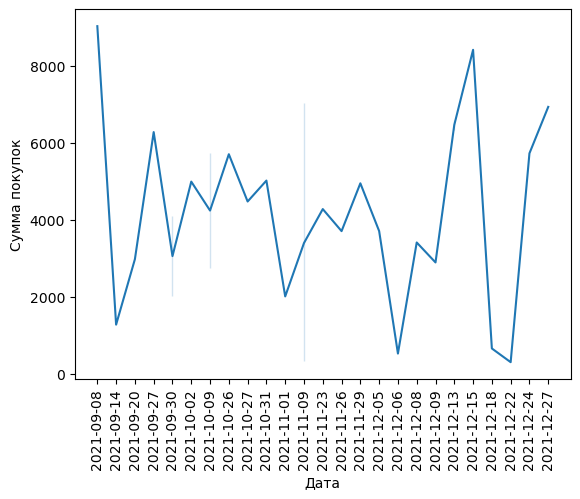

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

data_purchase = data_purchase.sort_values("Дата")
sns.lineplot(x='Дата', y='Сумма покупок', data=data_purchase)
plt.xticks(rotation=90)
plt.show()